# Connaître les fleurs avec PCA 

Apprenons à mieux utiliser la PCA avec le dataset d'iris. 

0. Importez les librairies usuelles 

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

1. Importez les données venant du l'URL suivant : 

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [ ]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                     names=['sepal length','sepal width','petal length','petal width', "target"])

In [ ]:
dataset.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2. Séparez votre dataset en ```X``` variables explicatives et ```y``` variable cible 

In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

3. Normalisez vos variables explicatives & mettez ces données dans un DataFrame

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=['sepal length','sepal width','petal length','petal width'])
X.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


4. Importez PCA et initialisez à 2 composants principaux 

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

5. Appliquez PCA à votre X et stockez ces nouvelles valeurs dans un DataFrame qu'on appellera ```principalDF```

In [ ]:
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDF.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


6. Visualisez ce que donne votre PCA. Dans un scatterplot, mettez en abscisse le premier composant, en ordonnée le second et mettez un hue dans laquelle vous avez votre target 

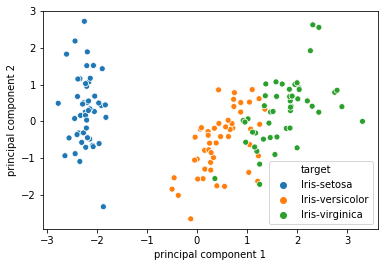

In [ ]:
sns.scatterplot(x=principalDF.columns[0], 
                y=principalDF.columns[1], 
                hue=dataset.columns[-1],
                data = pd.concat([principalDF, dataset.target], axis=1))

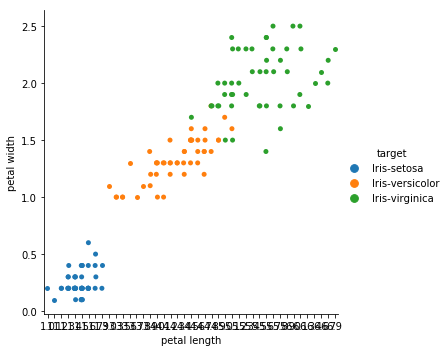

In [ ]:
sns.catplot(x = "petal length", y = "petal width", hue = "target", data = dataset)

In [ ]:
pd.DataFrame(pca.components_, columns = dataset.columns[:-1])

,sepal length,sepal width,petal length,petal width
0,0.522372,-0.263355,0.581254,0.565611
1,0.372318,0.925556,0.021095,0.065416


7. Regardez la ```variance explained``` que pouvez vous dire ?

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
pca?

Help on PCA in module sklearn.decomposition.pca object:

class PCA(sklearn.decomposition.base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, float, None or string
 |      Number of co